## Title:
> ### Why customers tends to Churn

## Goal:

> Discover supporting evidence the reason behind why customer are leaving the telecommunication company

> Create a model how accurate can it predict why customer are leaving the company

## Imports

In [56]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
import preprocess
import functions_used
import os

# Acquire

> Using the Telco dataset
>> The information was acquired from Codeup database using mySQL, the information was acquired in last week

>> The information 

>> After acquiring the Telco datas set, it was saved to a csv file 

>> Created a function read csv file if exist if not download from mySQL 

>> The file have 7043 rows represents entries, and 23 columns represents customer information and services  

>> The data represents information about a customer information in a telecommunication company

In [44]:
prepare.prep_telco(acquire.get_telco_db()).info()

this file exists, reading from csv file
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges 

## Prepare

> Prepare Actions:
>> * Used acquire.py file to acquire telco dataset and check if the dataset is already saved to a csv file

>> * Used prepare.py file to remove columns: payment_type_id, internet_service_type_id, contract_type_id, customer_id, and total_charges, Also, replaced empty characters with 0.0

>> * Used prepare.py file to split dataframe into 3 dataframe (train, validate, test)

>> * Used preprocess.py file to encode variables list all object type columns and change dtype of non-numeric columns

> #### A brief look at the data

In [41]:
prepare.prep_telco(acquire.get_telco_db()).head(3)

this file exists, reading from csv file


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,Yes,Month-to-month,Fiber optic,Electronic check


In [53]:
# To see how many people that have or not have churned
prepare.prep_telco(acquire.get_telco_db()).churn.value_counts()

this file exists, reading from csv file


churn
No     5174
Yes    1869
Name: count, dtype: int64

> #### A summary of the data

In [5]:
acquire.get_telco_db().describe()

this file exists, reading from csv file


,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [52]:
# Used the prepare function to split the dataframe and save it to train, validate, and test
train, validate, test = prepare.splitting_data(prepare.prep_telco(acquire.get_telco_db()), 'churn')

# breaking data set for modeling
train_encoded, validate_encoded, test_encoded = preprocess.preprocess_telco(train, validate, test)

# Isolate the target variable as its only column 
y_train = train_encoded['churn_Yes']
y_validate = validate_encoded['churn_Yes']
y_test = test_encoded['churn_Yes']

# Removing target variable for modeling
X_train = train_encoded.drop(columns=['churn_Yes'])
X_validate = validate_encoded.drop(columns=['churn_Yes'])
X_test = test_encoded.drop(columns=['churn_Yes'])

this file exists, reading from csv file


## Explore

#### I will show 4 explorations on which why customers are churning

#### 1. Hypothesize

> Question: Does customers tends to churn when seeing their monthly charges goes up?

>> Monthly_charges: continouos

>> Churn: categorical

> #### Visualize 

> $H_o$:    There IS NO relationship between monthly charges type and customer churning

> $H_a$:     There IS a relationship between contract type and customer churning

> alpha = 0.05

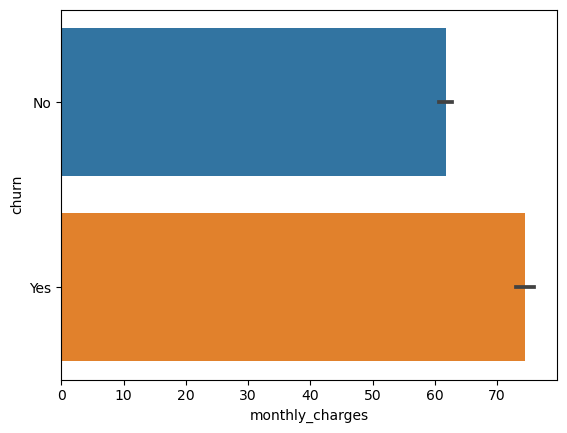

In [6]:
sns.barplot(data=train, x='monthly_charges', y='churn');

In [7]:
train_churn_yes = (train.churn == 'Yes').mean()
stats.ttest_ind(train.monthly_charges, train_churn_yes)

TtestResult(statistic=2.138187490683667, pvalue=0.03255874627471022, df=4224.0)

> #### Summarize (Comparing monthy charges and Churn = yes)

> p < alpha

> Conclusion: We reject the null hypothesis 
>> There is a relationshp between the monthly charges and customer churning

>> It seems when the monthly charges goes up, customer tends to churn


> #### 2. Hypothesize

> Question: Does customers tends to churn when seeing their monthly charges goes up and using paperless billing?
>> Monthly_charges: continouos

>> Churn: categorical

>> Paperless billing: categorical

> #### Visualize

> $H_o$: There IS NO relationship between monthly charges, paperless billing and customer churning

> $H_a$: There IS a relationship between monthly charges, paperless billing and customer churning

> alpha = 0.05

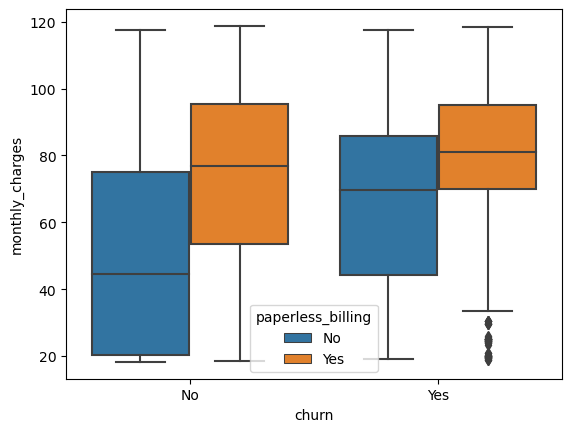

In [8]:
sns.boxplot(data=train, x='churn', y='monthly_charges', hue='paperless_billing');

In [9]:
train_monthly = train['monthly_charges'].mean()
train_paperless = (train.paperless_billing).value_counts(normalize=True).head(1)
train_churn = (train.churn == 'Yes').mean()

In [10]:
stats.kruskal(train_paperless, train_churn, train_monthly)

KruskalResult(statistic=2.0, pvalue=0.36787944117144245)

> ##### Summarize (Comparing paperless_billing, Churn = Yes, and Monthly_charges)

> p < alpha

> Conclusion: we reject the null hypothesis, 
>> There IS a relationship between monthly charges, paperless_billing, and customer churning

>> It seems that customers are churning when monthly charges goes up and using paperless billing

> #### 3. Hypothesize

> Question: Does customers tends to churn when seeing their monthly charges goes up and the type of contract?

> Monthly_charges: continouos

> Churn: categorical

> Contract type: categorical

> #### Visualize

> $H_o$: There IS a relationship between monthly charges, contract type and customer churning

> $H_a$: There IS NO relationship between monthly charges, contract type and customer churning

> alpha = 0.05

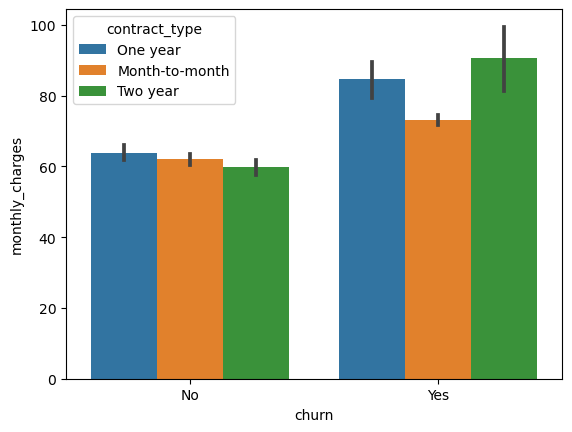

In [11]:
sns.barplot(data=train, y='monthly_charges', x='churn', hue='contract_type');

In [12]:
dummies_churn = pd.get_dummies(train.churn, drop_first=True).astype(int)
dummies_churn = dummies_churn.mean()

dummies_contract = pd.get_dummies(train.contract_type).astype(int)
dummies_contract = dummies_churn.mean()

In [13]:
stats.kruskal(train.monthly_charges, dummies_churn, dummies_contract)

KruskalResult(statistic=5.995777297439512, pvalue=0.04989229740704447)

> #### Summarize 3 (Comparing monthly_charges, churn = Yes, contract_type)

> p < alpha

> Conclusion: we reject the null hypothesis
>> There IS a relationship between Monthly charges, Contract_type and Customer churning

>> It seems that customers are churning when monthly charges are increasing and contract type from monthly, yearly, and two-year 

> #### 4. Hypothesize

> Question: Does customers tends to churn when seeing their monthly charges goes up and using payment type? 

> Monthly_charges: continouos

> Churn: categorical

> Payment type: categorical

> #### Visualize

> $H_o$: There IS NO relationship between Monthly charges, Contract type and Customer churning

> $H_a$: There IS a relationship between Monthly charges, Contract type and Customer churning

> alpha = 0.05

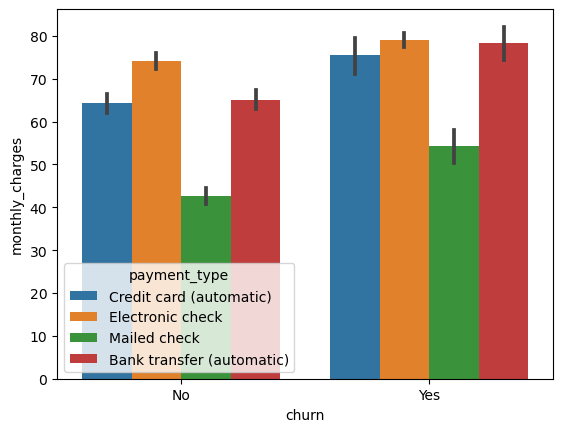

In [14]:
sns.barplot(data=train, y='monthly_charges', x='churn', hue='payment_type');

In [15]:
dummies_payment_type = pd.get_dummies(train.payment_type, drop_first=True).astype(int)
dummies_payment_type = dummies_payment_type.mean()

In [16]:
stats.kruskal(train.monthly_charges, dummies_churn, dummies_payment_type)

KruskalResult(statistic=11.985884953600483, pvalue=0.002496307904769981)

> #### Summarize 4 (Comparing monthly_charges, churn = Yes, Payment type)

> p < alpha

> Conclusion: we reject the null hypothesis
>> There IS a relationship between Monthly charges, Payment type and Customer churning

>> It seems that customers are churning seeing their monthly charges goes and the payment type 

# Exploration Summary

> * 1st Exploration: Monthly_charges and churn
>> It seems when the monthly charges goes up, customer tends to churn

> * 2nd Exploration: Monthly_charges, paperless_billing, and churn
>> It seems that customers are churning when monthly charges goes up and using paperless billing

> * 3rd Exploration: Monthly_charges, contract_type, and churn
>> It seems that customers are churning when monthly charges are increasing and contract type from monthly, yearly, and two-year 

> * 4th Exploration: Monthly_charges, payment_type, and churn
>> It seems customers are churning seeing monthly charges increased and type of payment 

> #### Take-aways
>> This shows that customers are churning went it comes to monthly charges increased, using paperless_billing, the type of contract, and how they are making payment

# Modeling
> #### Decision Tree, Random Forest, and Logistic Regression

>> I selected these modeling because it can handle both continuous and categorical data. It works well with features.

> ### 1. Decision Tree 
>> Baseline is: 73%

In [17]:
# Setting up my Baseline
y_train.mode()

0    0
Name: churn_Yes, dtype: int64

In [18]:
# taking the mean of mode
(y_train == 0).mean()

0.7346745562130178

> My baseline for churn_Yes is: 73%

In [19]:
# Setting up my model
tree = DecisionTreeClassifier()

# fit the object
tree.fit(X_train, y_train)

# Storing my predicted values
y_pred = tree.predict(X_train)

In [20]:
# Printing classificatin report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3104
           1       1.00      0.99      1.00      1121

    accuracy                           1.00      4225
   macro avg       1.00      1.00      1.00      4225
weighted avg       1.00      1.00      1.00      4225



In [21]:
# Using crosstab to clearly see the values for setting up confusion matrix
pd.crosstab(y_train, y_pred)

col_0,0,1
churn_Yes,,
0,3104,0
1,10,1111


In [22]:
# Used function to print classification report and confusion matrix
functions_used.compute_class_metrics(y_train, y_pred)

True Positive Rate/Sensitivity/Recall/Power: 0.9910793933987511
False Positive Rate/False Alarm Ratio/Fall-out: 0.0
True Negative Rate/Specificity/Selectivity: 1.0
False Negative Rate/Miss Rate: 0.008920606601248885

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3104
           1       1.00      0.99      1.00      1121

    accuracy                           1.00      4225
   macro avg       1.00      1.00      1.00      4225
weighted avg       1.00      1.00      1.00      4225



In [23]:
# Calling on the function using Decision Tree 
# input of max depth of 10
# output of accuracy score and validate score
functions_used.decision_tree(X_train, y_train, X_validate, y_validate)

max depth of 1, the accuracy score = 0.74, validate score = 0.73
max depth of 2, the accuracy score = 0.78, validate score = 0.79
max depth of 3, the accuracy score = 0.78, validate score = 0.79
max depth of 4, the accuracy score = 0.79, validate score = 0.78
max depth of 5, the accuracy score = 0.8, validate score = 0.79
max depth of 6, the accuracy score = 0.81, validate score = 0.79
max depth of 7, the accuracy score = 0.82, validate score = 0.78
max depth of 8, the accuracy score = 0.83, validate score = 0.78
max depth of 9, the accuracy score = 0.85, validate score = 0.78
max depth of 10, the accuracy score = 0.87, validate score = 0.77


> #### Using Decision Tree result
> Best model: Model with max_depth: 2, with accuracy_score: 78% and validate_score: 79%

> ### 2. Using Random Forest 

>> Baseline is: 73%

In [24]:
# Using Random Forest for my second algorithm
rf = RandomForestClassifier(max_depth=10)

# Fitting the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [25]:
# Storing values
y_pred = rf.predict(X_train)

# Taking the probability of prediction
y_pred_proba = rf.predict_proba(X_train)

# Accuracy score -- using only TRAIN
rf.score(X_train, y_train)

0.8733727810650888

In [26]:
# Using crosstab to clearly see the values for setting up confusion matrix
pd.crosstab(y_train, y_pred)

col_0,0,1
churn_Yes,,
0,2938,166
1,369,752


In [27]:
# Used function to print classification report and confusion matrix
functions_used.compute_class_metrics(y_train, y_pred)

True Positive Rate/Sensitivity/Recall/Power: 0.6708296164139161
False Positive Rate/False Alarm Ratio/Fall-out: 0.053479381443298966
True Negative Rate/Specificity/Selectivity: 0.946520618556701
False Negative Rate/Miss Rate: 0.32917038358608386

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3104
           1       0.82      0.67      0.74      1121

    accuracy                           0.87      4225
   macro avg       0.85      0.81      0.83      4225
weighted avg       0.87      0.87      0.87      4225



In [28]:
# Calling the function using random forest with a leaf samples, max depth and outputing accuracy score and validate score
functions_used.random_forest(X_train, y_train, X_validate, y_validate)

min_leaf_samples = 1, max_depth = 10, accuracy score = 0.87, validate score 0.81
min_leaf_samples = 2, max_depth = 9, accuracy score = 0.84, validate score 0.81
min_leaf_samples = 3, max_depth = 8, accuracy score = 0.83, validate score 0.8
min_leaf_samples = 4, max_depth = 7, accuracy score = 0.82, validate score 0.81
min_leaf_samples = 5, max_depth = 6, accuracy score = 0.8, validate score 0.8
min_leaf_samples = 6, max_depth = 5, accuracy score = 0.8, validate score 0.8
min_leaf_samples = 7, max_depth = 4, accuracy score = 0.79, validate score 0.79
min_leaf_samples = 8, max_depth = 3, accuracy score = 0.77, validate score 0.77
min_leaf_samples = 9, max_depth = 2, accuracy score = 0.73, validate score 0.73
min_leaf_samples = 10, max_depth = 1, accuracy score = 0.73, validate score 0.73


> #### Using Random Forest result
> Best model: The model with min_leaf_samples = 1, max_depth = 10, have accuracy of 87% and validation: 81%

> ### 3. Using Logistic Regression

>> Baseline is: 73%

> #### Used a function to load the features into the Algorithm

> features 1 = monthly_charges, contract_type_One year, and contract_type_Two year

> features 2 = monthly_charges, contract_type_One year, contract_type_Two year, and paperless_billing_Yes

> features 3 = monthly_charges, contract_type_One year, contract_type_Two year, paperless_billing_Yes, and internet_service_type_Fiber optic

> features 4 = monthly_charges, contract_type_One year, contract_type_Two year, paperless_billing_Yes, 
internet_service_type_Fiber optic and phone_service_Yes

In [30]:
lr = LogisticRegression()
lr

LogisticRegression()

In [54]:
# Called the function to get score with each feature and validation score
functions_used.lr_score(X_train, y_train, X_validate, y_validate)

accuracy_score with features 1: 0.739, validation_score: 0.742
accuracy_score with features 2: 0.752, validation_score: 0.756
accuracy_score with features 3: 0.767, validation_score: 0.769
accuracy_score with features 4: 0.767, validation_score: 0.769


> ### Logistic Regression result
>> Best model: The model with features 3 has the accuracy score: 77% and validataion score: 77% 

> #### Comparing Models
> * Decision Tree, Random Forest, and Logistic Regression models all performed above the baseline (73%)
>> 1. Decision Tree
>>> Model with max_depth: 2, with accuracy_score: 78% and validate_score: 79%

>> 2. Random Forest
>>> The model with min_leaf_samples = 1, max_depth = 10, have accuracy of 87% and validation: 81%

>> 3. Logistic Regression
>>> The model with features 3 has the accuracy score: 77% and validataion score: 77% 

> ### Modeling Summary
>> * The best model according to the results is using Random Forest 
>> * Using min_leaf_sample = 1 and max_depth = 10, having an accuracy of 87% and validation of 81%

In [32]:
# Testing the best model for score
rf.score(X_test, y_test)

0.7998580553584103

> #### Running test on best model
>> The accuracy scored: 80%

# Conclusion
> ### Exploration
>> There are clear evidence that customers are churning because of monthly charges, payment type, contract type, paperless billing

> ### Modeling
>> Using 3 types of modeling and to select best one came up with an accuracy score of 80%. I can conclude that model is a good one to use

> ### Recommendations
>> The telecommunication company should look into the monthly charges increased and contract type first, since there is a big difference from customers that are churning. Also, payment type and paperless billing can both affect customers in churning. 

> ### Next Steps
>> If there is another opportunity to look into the dataset, I would like to research other reasons within the dataset that may perhaps a reason why customers are churning. 

In [36]:
# Using a function to print Customer_id, Probability of Churn and Prediction of Churn
functions_used.check_file_churn('churn_csv', y_pred, y_pred_proba)

this file exists, reading from csv file
this file does not exist, export file into csv
     customer_id  Probability of Churn  Prediction of Churn
0     0002-ORFBO              0.144235                    0
1     0003-MKNFE              0.734194                    1
2     0004-TLHLJ              0.486443                    0
3     0011-IGKFF              0.657547                    1
4     0013-EXCHZ              0.086107                    0
...          ...                   ...                  ...
4220  5955-ERIHD              0.739226                    1
4221  5956-VKDTT              0.044904                    0
4222  5956-YHHRX              0.033292                    0
4223  5959-BELXA              0.690626                    1
4224  5960-MVTUK              0.410326                    0

[4225 rows x 3 columns]
